In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
from imblearn.over_sampling import RandomOverSampler
import collections
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


In [2]:
df = pd.read_csv('creditcard.csv')
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51586,45023,-2.943382,-2.332451,2.568959,0.747114,2.083550,-1.319267,-1.837967,0.421285,0.347715,...,-0.013848,-0.091317,-0.268974,0.069693,0.202920,0.356930,-0.006093,0.268288,26.24,0.0
51587,45024,-1.278283,-3.726046,-0.902718,2.796542,-1.750987,0.199763,1.223412,-0.106145,0.793279,...,0.664178,-0.592258,-1.141974,0.322687,0.081328,-0.354449,-0.150956,0.269036,1233.16,0.0
51588,45024,-0.852261,0.886192,-0.378032,-1.142044,1.880941,3.505875,-0.403582,1.365218,-0.369193,...,0.091829,0.066337,-0.055970,1.027545,-0.327900,0.255778,0.132317,0.133329,28.98,0.0
51589,45024,-0.447740,0.775759,1.586053,0.227702,-0.270962,-0.539013,0.488655,0.071070,0.308739,...,-0.033903,0.202157,-0.180777,0.424592,-0.172455,0.365861,0.353120,0.198239,3.99,0.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51591 entries, 0 to 51590
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    51591 non-null  int64  
 1   V1      51591 non-null  float64
 2   V2      51591 non-null  float64
 3   V3      51591 non-null  float64
 4   V4      51591 non-null  float64
 5   V5      51591 non-null  float64
 6   V6      51591 non-null  float64
 7   V7      51591 non-null  float64
 8   V8      51591 non-null  float64
 9   V9      51591 non-null  float64
 10  V10     51591 non-null  float64
 11  V11     51590 non-null  float64
 12  V12     51590 non-null  float64
 13  V13     51590 non-null  float64
 14  V14     51590 non-null  float64
 15  V15     51590 non-null  float64
 16  V16     51590 non-null  float64
 17  V17     51590 non-null  float64
 18  V18     51590 non-null  float64
 19  V19     51590 non-null  float64
 20  V20     51590 non-null  float64
 21  V21     51590 non-null  float64
 22

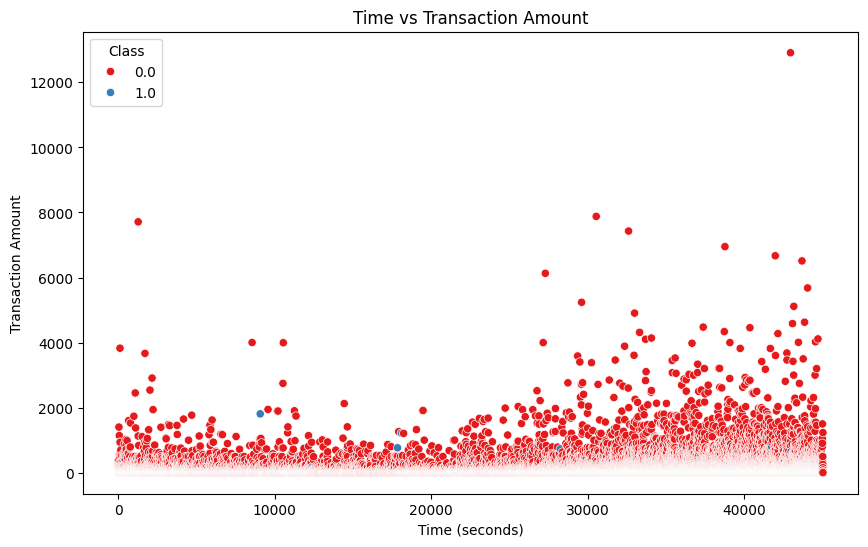

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Time', y='Amount', hue='Class', palette='Set1')
plt.title('Time vs Transaction Amount')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.show()

<ipython-input-5-ee3436a0c415>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




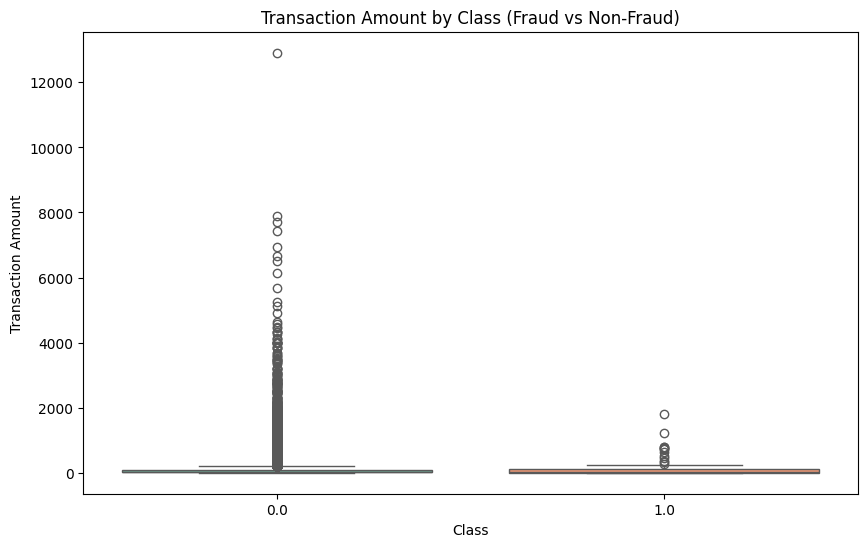

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class', y='Amount', palette='Set2')
plt.title('Transaction Amount by Class (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

<ipython-input-6-fe0079432382>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




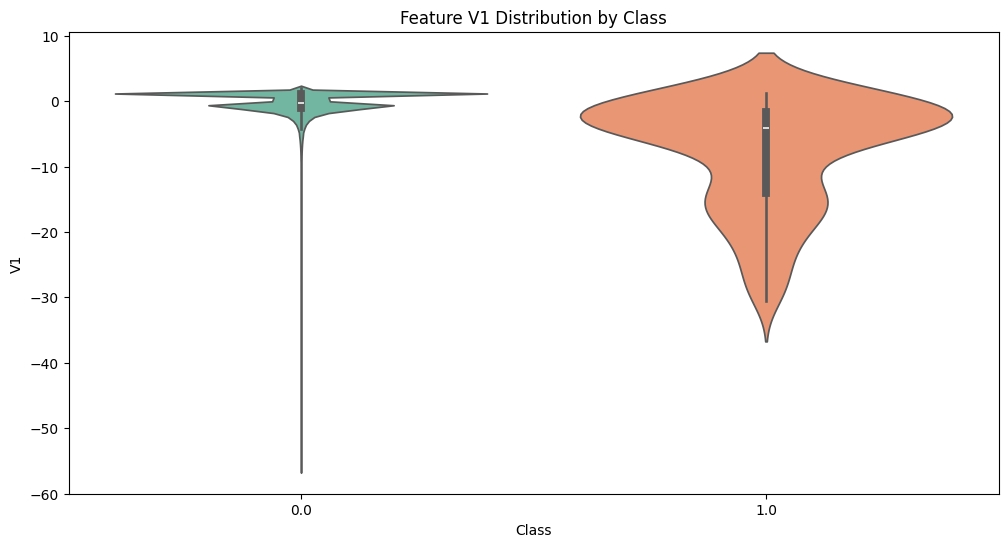

In [6]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Class', y='V1', palette='Set2')
plt.title('Feature V1 Distribution by Class')
plt.show()

In [7]:
df['Class'].value_counts()


,count
Class,
0.0,51440
1.0,150


In [8]:
x=df.drop(columns='Class',axis=1)
y=df.Class

In [11]:
x=df
y=df.Class


Oversampling Techniques

In [15]:
# Before applying RandomOverSampler
df = df.dropna(subset=['Class'])  # Remove rows with NaN values in 'Class' column

# ... (rest of your code remains the same)

# Ensure x and y are derived from the cleaned df
x = df.drop(columns='Class', axis=1)  # Use the cleaned df to create x
y = df['Class']  # Use the cleaned df to create y

oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
xm, ym = oversample.fit_resample(x, y)
counter = collections.Counter(ym)
print(counter)

Counter({0.0: 51440, 1.0: 51440})


In [16]:
ym.info()

<class 'pandas.core.series.Series'>
RangeIndex: 102880 entries, 0 to 102879
Series name: Class
Non-Null Count   Dtype  
--------------   -----  
102880 non-null  float64
dtypes: float64(1)
memory usage: 803.9 KB


In [17]:
def detect_outliers(X, column, k=3):
    """Detects outliers in a column using the IQR method."""
    data = X[column]
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    iqr = Q3 - Q1
    lower_bound = Q1 - (k * iqr)
    upper_bound = Q3 + (k * iqr)
    outlier_indices = np.where((data < lower_bound) | (data > upper_bound))[0]
    return outlier_indices

def remove_outliers(X, k=3):
    """Removes outliers from a DataFrame using the IQR method."""
    X_copy = X.copy()
    outlier_indices_all = np.array([], dtype=int)
    outlier_columns = []

    for column in X_copy.columns:
        outlier_indices = detect_outliers(X_copy, column, k)
        if len(outlier_indices) > 0:
            outlier_columns.append(column)
            outlier_indices_all = np.concatenate((outlier_indices_all, outlier_indices))
            outlier_indices_all = np.unique(outlier_indices_all)

    if len(outlier_indices_all) > 0:
        labels_to_remove = X_copy.index[outlier_indices_all]
        X_copy = X_copy.drop(labels_to_remove, axis=0)

    return X_copy, outlier_columns

In [18]:
xm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102880 entries, 0 to 102879
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    102880 non-null  int64  
 1   V1      102880 non-null  float64
 2   V2      102880 non-null  float64
 3   V3      102880 non-null  float64
 4   V4      102880 non-null  float64
 5   V5      102880 non-null  float64
 6   V6      102880 non-null  float64
 7   V7      102880 non-null  float64
 8   V8      102880 non-null  float64
 9   V9      102880 non-null  float64
 10  V10     102880 non-null  float64
 11  V11     102880 non-null  float64
 12  V12     102880 non-null  float64
 13  V13     102880 non-null  float64
 14  V14     102880 non-null  float64
 15  V15     102880 non-null  float64
 16  V16     102880 non-null  float64
 17  V17     102880 non-null  float64
 18  V18     102880 non-null  float64
 19  V19     102880 non-null  float64
 20  V20     102880 non-null  float64
 21  V21     10

In [33]:
def remove_outliers(X, k=3):
    """Removes outliers from a DataFrame using the IQR method, but keeps the 'Class' column."""
    X_copy = X.copy()

    # Store the 'Class' column separately
    class_column = X_copy['Class']

    # Remove the 'Class' column before outlier detection
    X_copy = X_copy.drop(columns=['Class'])

    outlier_indices_all = np.array([], dtype=int)
    outlier_columns = []

    for column in X_copy.columns:
        outlier_indices = detect_outliers(X_copy, column, k)
        if len(outlier_indices) > 0:
            outlier_columns.append(column)
            outlier_indices_all = np.concatenate((outlier_indices_all, outlier_indices))
            outlier_indices_all = np.unique(outlier_indices_all)

    if len(outlier_indices_all) > 0:
        labels_to_remove = X_copy.index[outlier_indices_all]
        X_copy = X_copy.drop(labels_to_remove, axis=0)
        # Remove corresponding rows from the 'Class' column as well
        class_column = class_column.drop(labels_to_remove, axis=0)

    # Add the 'Class' column back to the DataFrame
    X_copy['Class'] = class_column

    return X_copy, outlier_columns

In [35]:
# In your code, before the line causing the error:
df = pd.read_csv('creditcard.csv')  # Or use your original DataFrame loading method
X = df.drop(columns='Class', axis=1)  # Define X as needed
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150632 entries, 0 to 150631
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    150632 non-null  int64  
 1   V1      150632 non-null  float64
 2   V2      150632 non-null  float64
 3   V3      150632 non-null  float64
 4   V4      150632 non-null  float64
 5   V5      150632 non-null  float64
 6   V6      150632 non-null  float64
 7   V7      150632 non-null  float64
 8   V8      150631 non-null  float64
 9   V9      150631 non-null  float64
 10  V10     150631 non-null  float64
 11  V11     150631 non-null  float64
 12  V12     150631 non-null  float64
 13  V13     150631 non-null  float64
 14  V14     150631 non-null  float64
 15  V15     150631 non-null  float64
 16  V16     150631 non-null  float64
 17  V17     150631 non-null  float64
 18  V18     150631 non-null  float64
 19  V19     150631 non-null  float64
 20  V20     150631 non-null  float64
 21  V21     15

Random Forest


In [36]:
rf_model = RandomForestClassifier(
    n_estimators=100,          # Number of trees
    max_depth=5,               # Maximum depth of each tree
    random_state=42,           # For reproducibility
)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Class']), df['Class'], test_size=0.2, random_state=42)

In [50]:
# Before calling train_test_split, handle missing values in 'Class' column:
df = pd.read_csv('creditcard.csv')
df.dropna(subset=['Class'], inplace=True)  # Remove rows with NaN in 'Class'

# Now proceed with your train_test_split:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Class']), df['Class'], test_size=0.2, random_state=42)

# ... (rest of your code) ...
rf_model = RandomForestClassifier(
    n_estimators=10,
    max_depth=2,
    max_features=1,
    bootstrap=False,
    random_state=42
)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.86%


Decision Tree


In [49]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtree.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [51]:
predictions = dtree.predict(X_test)
predictions

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     41145
         1.0       0.88      0.84      0.85        67

    accuracy                           1.00     41212
   macro avg       0.94      0.92      0.93     41212
weighted avg       1.00      1.00      1.00     41212

[[41137     8]
 [   11    56]]


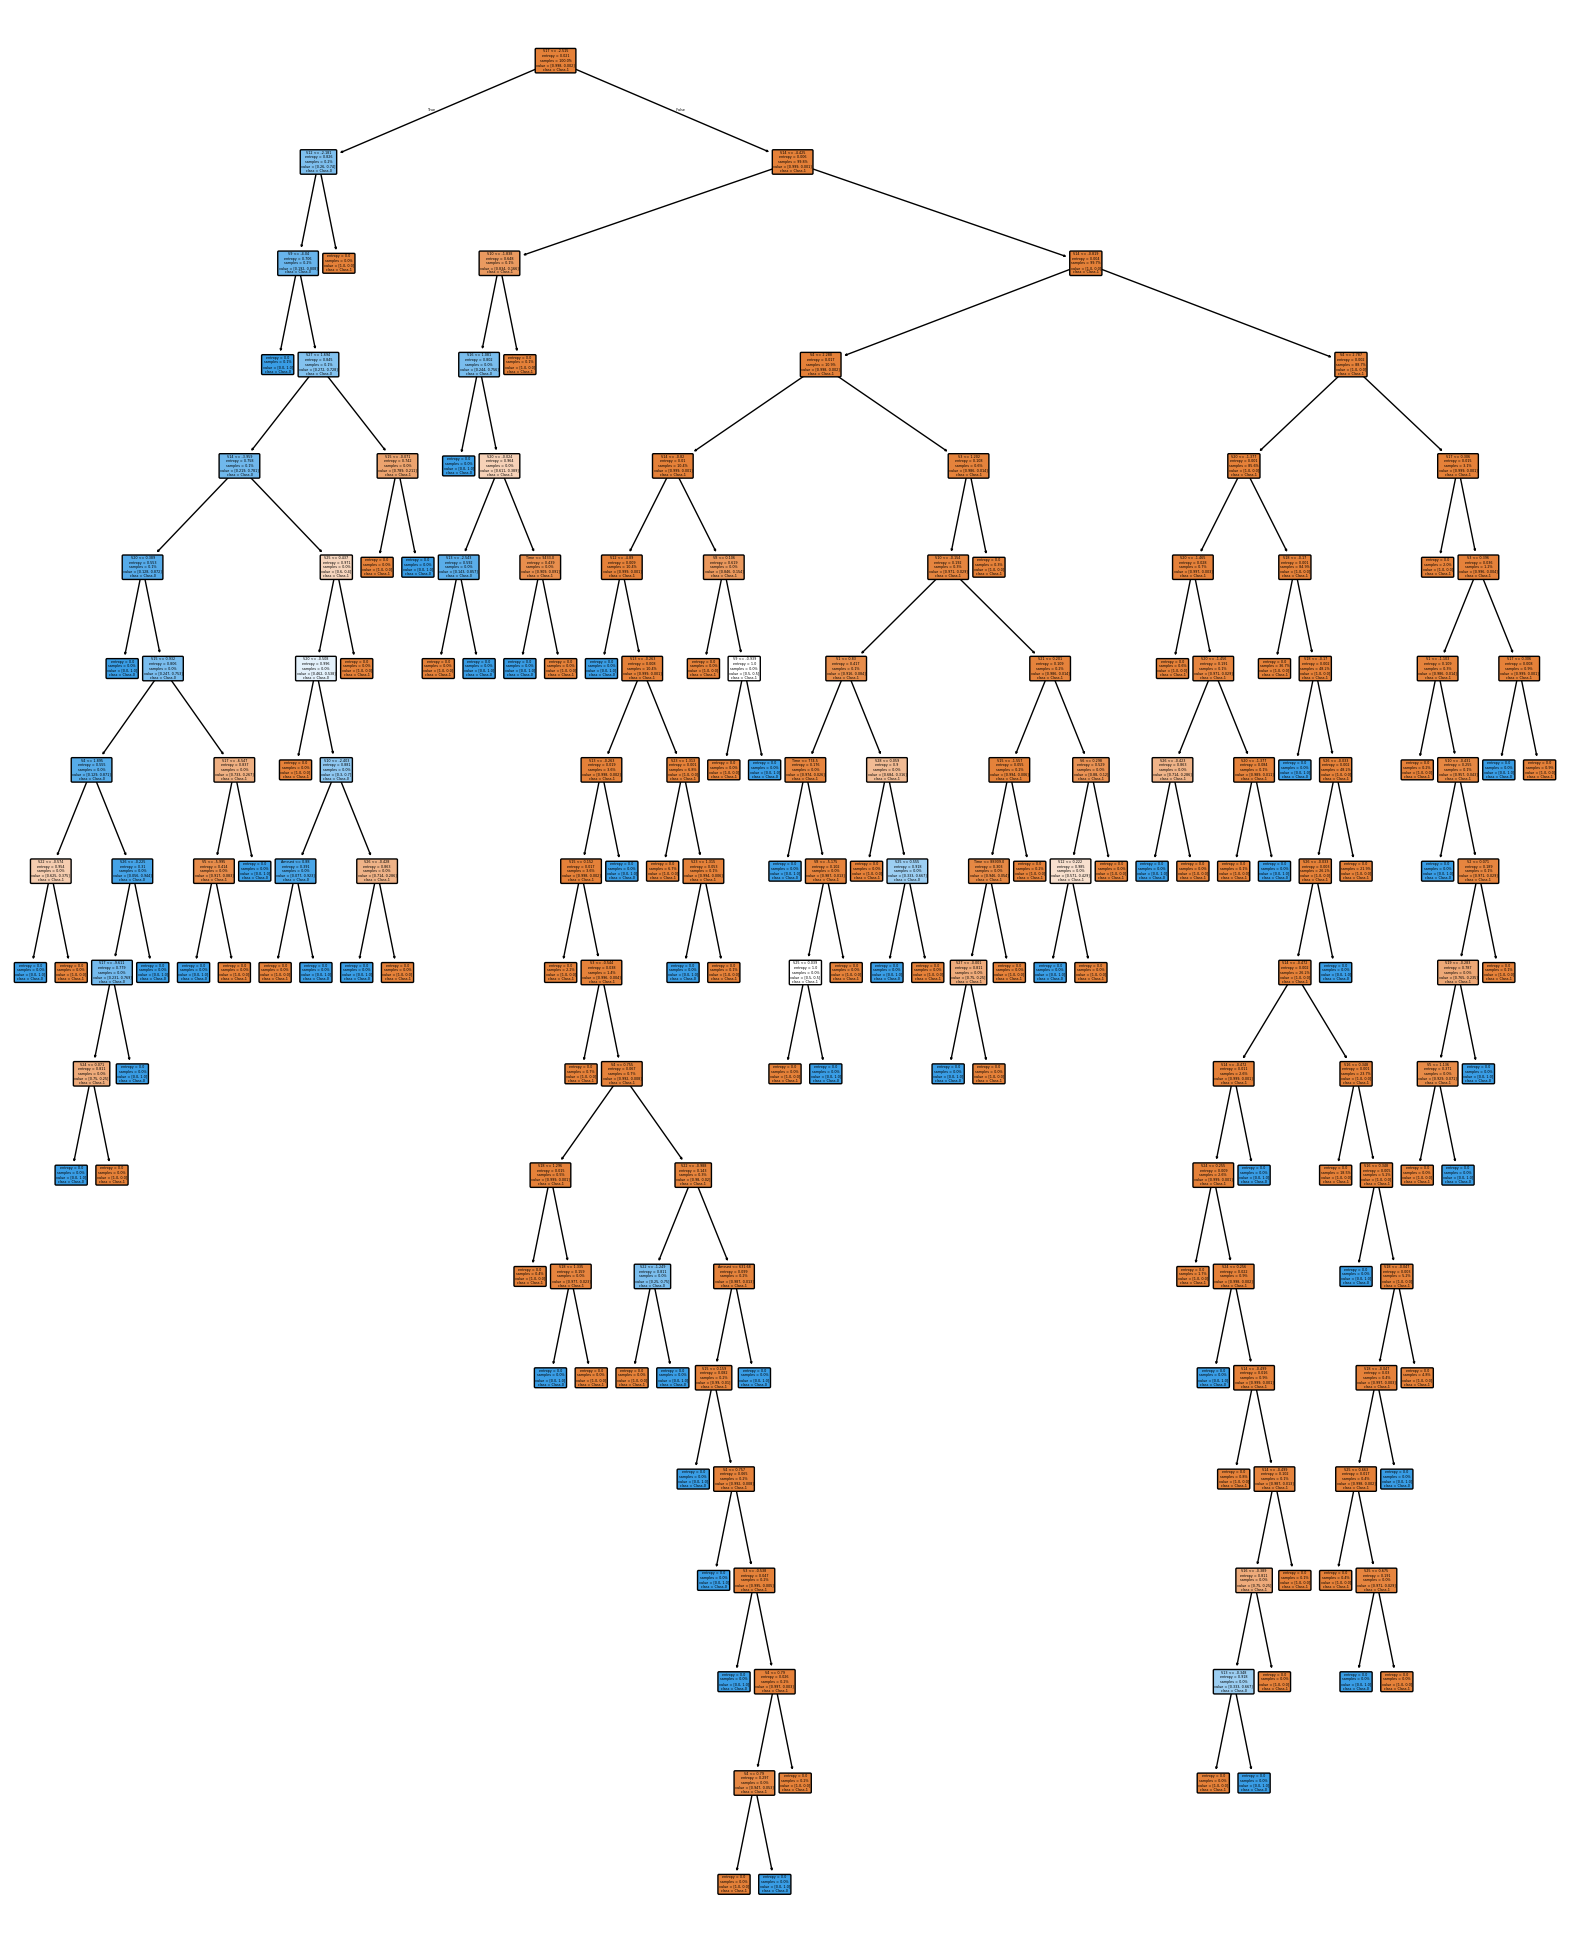

In [53]:
from sklearn import tree
plt.figure(figsize=(20,25))
tree.plot_tree(dtree,feature_names=X.columns,class_names=['Class-1', 'Class-0'],rounded=True, # Rounded node edges
          filled=True, # Adds color according to class
          proportion=True
        )
plt.show()

Logistic Regression


In [54]:
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [55]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)


Accuracy on Training data :  0.9987200097060875


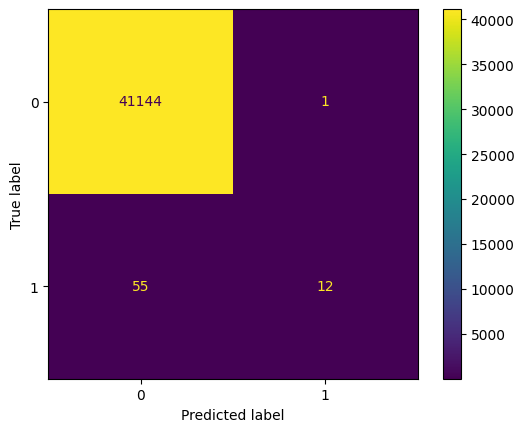

In [56]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

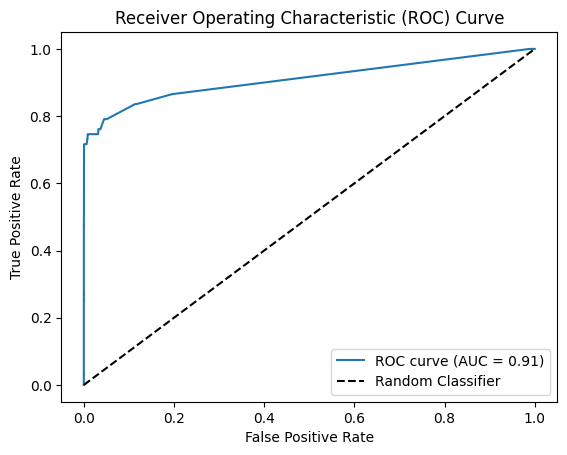

In [60]:
Y_hat_proba = rf_model.predict_proba(X_test) # Remove the column selection
fpr, tpr, thresholds = roc_curve(y_test, Y_hat_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [61]:
print(f"roc-auc accuracy for imbalanced set: {auc(fpr, tpr)}")


roc-auc accuracy for imbalanced set: 0.9099511556327005
